<a href="https://colab.research.google.com/github/sbm367/Coronavirus-Deep-Learning-Competition/blob/master/Coronavirus_Deep_Learning_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install RDKit

In [1]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-03-03 03:10:34--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   185MB/s    in 0.4s    

2020-03-03 03:10:35 (185 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
  

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

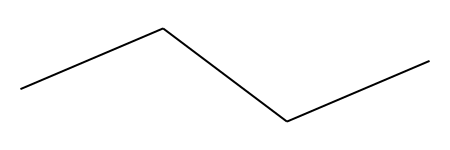

In [3]:
#Convert from smile to mol or from mol to smile
mol = Chem.MolFromSmiles('CCCC')
mol


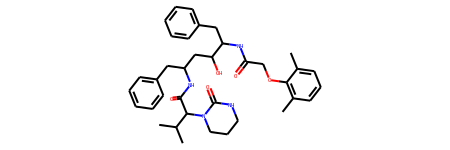

In [4]:
lopinavir = Chem.MolFromSmiles('CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(CC3=CC=CC=C3)NC(=O)C(C(C)C)N4CCCNC4=O)O')
lopinavir

In [5]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [6]:
#calculatee features from mol representatio
lopinavir_mw = Descriptors.MolWt(lopinavir)
lopinavir_mw

628.814

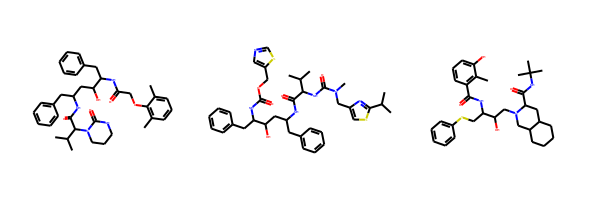

In [7]:
# can find sub structure similarities within list of mols

#should have done as loop, need to rewrite
lopinavir_sm = Chem.MolToSmiles(lopinavir)
ritonavir = Chem.MolFromSmiles('CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O')
ritonavir_sm = Chem.MolToSmiles(ritonavir)
nelfinavir = Chem.MolFromSmiles('CC1=C(C=CC=C1O)C(=O)NC(CSC2=CC=CC=C2)C(CN3CC4CCCCC4CC3C(=O)NC(C)(C)C)O')
nelfinavir_sm = Chem.MolToSmiles(nelfinavir)

hiv_protease_inhibitiors_smiles = [lopinavir_sm, ritonavir_sm, nelfinavir_sm]
hiv_protease_inhibitiors_mols = [lopinavir, ritonavir, nelfinavir]

img = Draw.MolsToGridImage(hiv_protease_inhibitiors_mols)
img

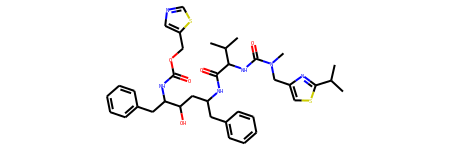

has a sulfer atom
has a carboxyl gorup
has a 5 member ring


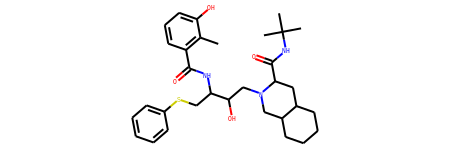

has a sulfer atom


In [8]:
# Substructure search based on specific atoms, smile sequences or higher structural abstractions

# Sulfer
s_pattern = Chem.MolFromSmiles('S')

# Carboxyl Group
COOH_pattern = Chem.MolFromSmiles('C(=O)O')

# 5 member rings
five_ring_pattern = Chem.MolFromSmarts('[r5]')

for mol in hiv_protease_inhibitiors_mols:
  flag = False
  if (mol.HasSubstructMatch(s_pattern)):
    display(mol)
    flag = True
    print('has a sulfer atom')
  if (mol.HasSubstructMatch(COOH_pattern)):
    if flag == False:
      display(mol)
      flag = True
    print('has a carboxyl gorup')
  if (mol.HasSubstructMatch(five_ring_pattern)):
    if flag == False:
      display(mol)
    print('has a 5 member ring')




In [9]:
# Molecular IDs via Morgan/Circular/ECFP Algorithm
lopinavir
# The radius is the max number of graph nieghbors whoes information will be encoded in each atoms local fingerpring
# larger radiuses incorporate more info, but are more computationaly costly.
# A radius of 2 is usualy considered a good comprimise in the literature
bi = {}
lopinavir_fp = AllChem.GetMorganFingerprintAsBitVect( lopinavir, 2 , nBits=1024, bitInfo = bi)
# Fingerprints are represented as binary bit vectors. 
# There is a tradeoff between information density and sparsity When choosing the size of the encoding vector
lopinavir_fp_ary = np.zeros((1,))
DataStructs.ConvertToNumpyArray(lopinavir_fp, lopinavir_fp_ary)

lopinavir_fp_ary

array([0., 1., 0., ..., 0., 0., 0.])

In [10]:
# Specific feature identification from fingerprints
print(np.nonzero(lopinavir_fp_ary))

(array([  1,   4,  15,  33,  37,  41,  42,  64,  79,  80,  90, 108, 117,
       126, 128, 175, 192, 227, 278, 283, 305, 314, 316, 333, 356, 360,
       367, 375, 389, 411, 428, 456, 459, 541, 551, 573, 606, 635, 650,
       679, 680, 688, 695, 698, 726, 730, 747, 749, 752, 807, 812, 837,
       839, 842, 849, 857, 876, 888, 893, 897, 911, 926, 928, 935, 975,
       980]),)


In [11]:
# Get features as list
lopinavir_fp_list = [ ( lopinavir, x, bi) for x in lopinavir_fp.GetOnBits() ]
lopinavir_fp_list

[(<rdkit.Chem.rdchem.Mol at 0x7f503790d4e0>,
  1,
  {1: ((13, 0), (21, 0), (23, 0), (34, 0), (35, 0)),
   4: ((40, 1),),
   15: ((5, 2),),
   33: ((0, 0), (7, 0), (36, 0), (37, 0)),
   37: ((43, 2),),
   41: ((10, 1),),
   42: ((16, 2), (20, 2), (26, 2), (30, 2)),
   64: ((5, 1), (17, 1), (18, 1), (19, 1), (27, 1), (28, 1), (29, 1)),
   79: ((14, 1), (24, 1)),
   80: ((9, 0), (14, 0), (22, 0), (24, 0)),
   90: ((42, 0),),
   108: ((38, 2),),
   117: ((12, 1), (31, 1)),
   126: ((42, 2),),
   128: ((12, 0), (31, 0)),
   175: ((17, 2), (27, 2), (19, 2), (29, 2)),
   192: ((9, 2),),
   227: ((45, 1),),
   278: ((41, 2),),
   283: ((36, 1), (37, 1)),
   305: ((41, 1),),
   314: ((44, 1),),
   316: ((39, 2),),
   333: ((2, 1),),
   356: ((1, 0), (2, 0), (3, 0), (15, 0), (25, 0), (43, 0)),
   360: ((22, 2),),
   367: ((3, 1), (1, 1)),
   375: ((13, 1),),
   389: ((18, 2), (28, 2), (31, 2)),
   411: ((8, 2),),
   428: ((8, 1),),
   456: ((39, 1),),
   459: ((23, 2),),
   541: ((3, 2), (1, 2))

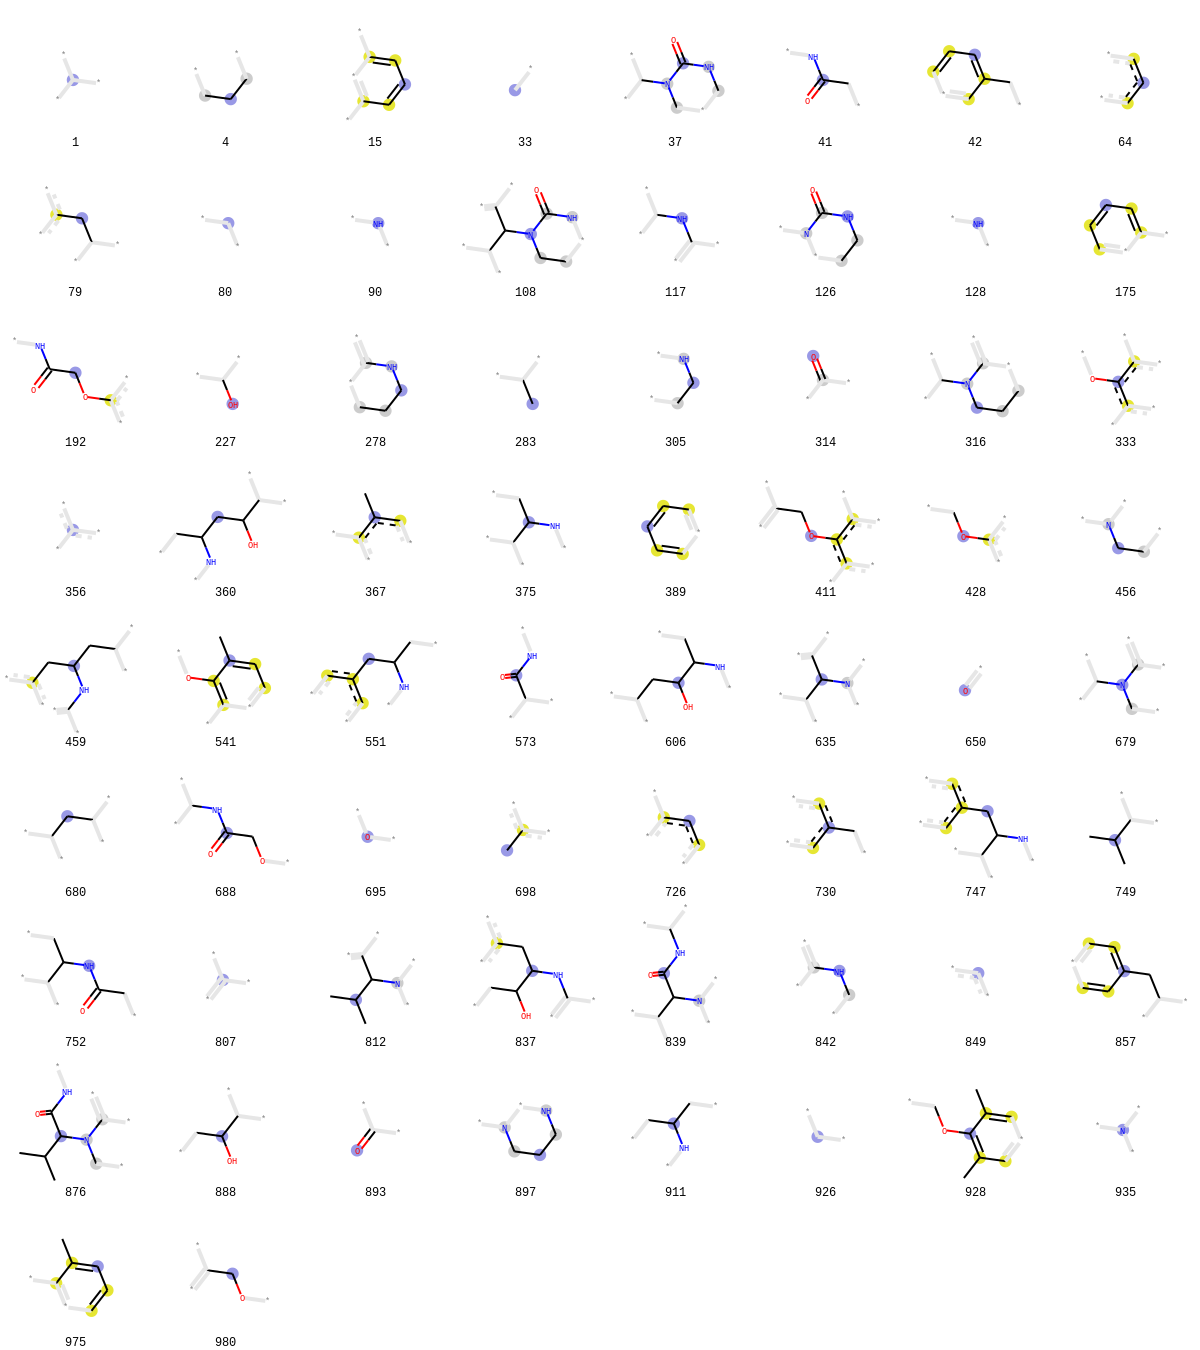

In [12]:
# Draw Morgan Bits
Draw.DrawMorganBits(lopinavir_fp_list, molsPerRow = 8, legends=[str(x) for x in lopinavir_fp.GetOnBits()])


In [13]:
# Measuring Molecular Similarity using Tanimoto Distance / Jaccard Similarity Index
ritonavir_fp = AllChem.GetMorganFingerprintAsBitVect(ritonavir, 2 , nBits=1024)

print(DataStructs.TanimotoSimilarity(lopinavir_fp,ritonavir_fp))

0.3177570093457944


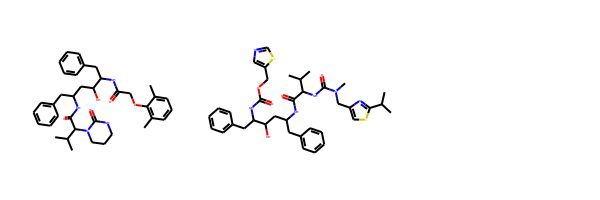

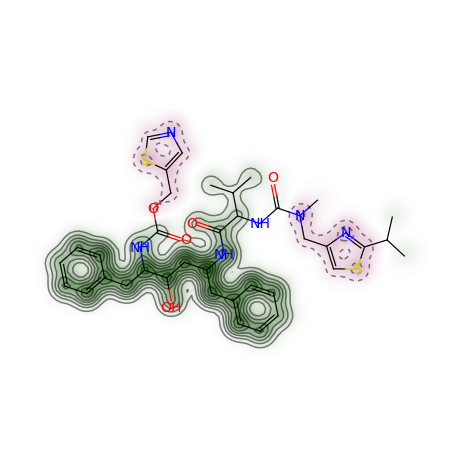

In [14]:
# Vizualizing Molecular Similarity
lr_comp = [lopinavir, ritonavir]
img2 = Draw.MolsToGridImage(lr_comp)
display(img2)
from rdkit.Chem.Draw import SimilarityMaps
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(lopinavir, ritonavir, SimilarityMaps.GetMorganFingerprint)


**Trying to run PyRX/Autodock Vina from colab here, might f everything up...**

In [15]:
!git clone https://github.com/Jon-Conesa/Easy-Autodock-Vina.git


Cloning into 'Easy-Autodock-Vina'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [16]:
ls

Easy-Autodock-Vina/  Miniconda3-latest-Linux-x86_64.sh*  sample_data/


In [17]:
cd Easy-Autodock-Vina/

/content/Easy-Autodock-Vina


In [18]:
ls

Easy_Autodock_Vina.py  LICENSE  README.md


Would need to get PDB file into this directory

In [19]:
%%python3 

Easy_Autodock_Vina.py

Traceback (most recent call last):
  File "<stdin>", line 2, in <module>
NameError: name 'Easy_Autodock_Vina' is not defined


In [20]:
%%writefile Easy_Autodock_Vina.py
def f():
  print('This is a function defined in a Python source file.')

Overwriting Easy_Autodock_Vina.py


In [21]:
# Bring the file into the local Python environment.
exec(compile(open('Easy_Autodock_Vina.py'), "rb").read(), 'Easy_Autodock_Vina.py', 'exec')
# Call the function defined in the file.
f()

TypeError: ignored

**Random notes**

Abstraction hierarchies:

Rich lewis def : atoms => functional groups => pharmacophors

Wengong Jin : [ref his slides ]


Define encodings & distance for each layer of abstraction

    ? best data struct / encoding & distance measure for each abs layer? 
    ? does cosine similarity work for circular fingerprints? 
    e.g. atoms:(SMILEs, levenstien distance)


Define candidate set / starting point nieghborhood

    e.g. FDA aproved HIV protease inhibitors

Compute average/max variation of candidate set in each metric

    e.g. Atoms:(SMILES, Levenstien) - 5.7 average edit distance, 15 max edit distance

    note : longer the initial SMILE, the larger the search space given the same distance b/c of curse of dimensionality

    ? how do intraset, pairwise distances of starting set change at each abs layer?

Find efficent search algorithm @ each abs layer to explore local candidate space, bounded by avrg/max var computed earlier

    e.g. randomly sample/baysiean sample SMILE strings within 5.7 edit distance of drung candidate like Lopinavir:
    CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(CC3=CC=CC=C3)NC(=O)C(C(C)C)N4CCCNC4=O)O

    Note : need basic filter to ensure valid molecues are being generated, e.g. checks mol bond number, etc.

Run QSAR model like PyRX/AutoDock Vina, DL based QSAR, ?PyMol/LiSiCA? to get binding affinity score for COVID-19 Protease, optimize for highest score

    Note : binding scores may vary across multiple runs, need to find optimal sample number, also need model to blend scores from multiple QSARs

? What algos to get representations and whaat algos to search ?

e.g. montecarlo tree search + RL, a-la alpha-go zero?

A*, dikestra, graph search? - probably blows up

seq2seq/transformer/attention

randforest, xgboost, grad boost? 

Rish lewis talk, chEMBL database, 
seperate hit from misses, 
normally binarize around a certain axis,
b/c preicting binary binding, used cross entropy as loss fcn,
in his example put in a mol and it prediccts protien interactions,
also randomly deleted atoms from mol, got new similarity map, reran, saw how binding score changed to ID important features, made heatmap of avrg score distance created by deleting each atom,
also retrained new model w/ transfer learning to take advantage of prlearned pharmacophores and train new model faster,
mentioned jaccard similarity on hashed feature vectors,
aluded to graph neural networks (GNNs) at end of talk,
differentiable neural computer (DNC) for graph data

? What the heck are my training, validation and test sets going to be???




<h1>Glossary</h1>
<ul>
<li><b>QSAR</b>: Quantitative structure–activity relationship models are regression or classification models used in the chemical and biological sciences and engineering. The predictors consist of physico-chemical properties or theoretical molecular descriptors of chemicals; the QSAR response-variable could be a biological activity of the chemicals <sup>[1][2]</sup>.</li>
<li><b>Pharmacophore</b>: High level structural motif of a molecue responsible for its biologic activity <sup>[3]</sup></li>

<li><b>ECFP</b>: Extended Connectivity FingerPrinting. 1 )Assign each atom with an identifier
2) Update each atom’s identifiers based on its neighbours
3) Remove duplicates
4) Fold list of identifiers into a 2048-bit vector (a Morgan fingerprint). Naive similarity to GNN aproach, but used predefined hashing function to fold in nieghborhod info rather than update vectors vs training.<sup>[4]</sup></li>
<li><b>Tanimoto similarity</b>: Standard similarity metic used to compare molecular fingerprint vectors. Defined as the dot product of the two vectors divided by the sum of the two vector sums minus the dot product. Tani(Vi,Vj) = Vi*Vj / ( Sigma(Vi)+Sigma(Vj) - Vi*Vj). Note that the vectors are of identical length. The Tanimoto simmilarity is a special case of the Jaccard Similarity Index, also known as Intersection over Union. Two structures are usually considered similar if T > 0.85, although this dosn't necisarily imply similar bioactivity<sup>[5][6]</sup></li>
<li><b>GNN</b>: Graph Neural Network ... <sup>[n]</sup></li>
<li><b>li</b>: lorum ipsum <sup>[n]</sup></li>

</ul>



<h1>References</h1>
<ol>
<li>Wikipedia - Quantitative structure–activity relationship : https://en.wikipedia.org/wiki/Quantitative_structure%E2%80%93activity_relationship
</li>
<li>Rich Lewis - Deep Learning for QSAR : https://www.youtube.com/watch?v=kInLYwitfFs</li>
<li>Wikipedia - Pharmacophore : https://en.wikipedia.org/wiki/Pharmacophore</li>
<li> <a href="https://towardsdatascience.com/a-practical-introduction-to-the-use-of-molecular-fingerprints-in-drug-discovery-7f15021be2b1" target=_blank>Medium - Towards Data Science, A Practical Introduction to the Use of Molecular Fingerprints in Drug Discovery</a> : https://towardsdatascience.com/a-practical-introduction-to-the-use-of-molecular-fingerprints-in-drug-discovery-7f15021be2b1
 </li>
<li> Fingerprints in the RDKit, Slide 3 : https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf</li>
<li> Wikipedia - Chemical Similarity : https://en.wikipedia.org/wiki/Chemical_similarity#Similarity_measures</li>
<li></li>
</ol>